In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
#import csv
import os.path
import datetime
from cycler import cycler
import pandas as pd
import matplotlib.ticker as ticker


In [35]:
filename = "HPCG/nvidia-smi-hpcg_m60_combined.csv"
print "Reading",filename

smi_df = pd.read_csv(filename)

Reading HPCG/nvidia-smi-hpcg_m60_combined.csv


In [36]:
smi_df.iloc[:2]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
0,2018/01/18 08:49:36.801,Tesla M60,7613 MiB,1 MiB,99 %,6 %
1,2018/01/18 08:49:36.902,Tesla M60,7613 MiB,89 MiB,99 %,6 %


In [37]:
smi_df.index = pd.to_datetime(smi_df['timestamp'])
smi_df.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
timestamp,,,,,,
2018-01-18 08:49:36.801,2018/01/18 08:49:36.801,Tesla M60,7613 MiB,1 MiB,99 %,6 %
2018-01-18 08:49:36.902,2018/01/18 08:49:36.902,Tesla M60,7613 MiB,89 MiB,99 %,6 %
2018-01-18 08:49:37.003,2018/01/18 08:49:37.003,Tesla M60,7613 MiB,105 MiB,32 %,2 %


In [38]:
start = smi_df.index[0]
smi_df["delta"] = smi_df.index - start
smi_df.iloc[:2]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],delta
timestamp,,,,,,,
2018-01-18 08:49:36.801,2018/01/18 08:49:36.801,Tesla M60,7613 MiB,1 MiB,99 %,6 %,00:00:00
2018-01-18 08:49:36.902,2018/01/18 08:49:36.902,Tesla M60,7613 MiB,89 MiB,99 %,6 %,00:00:00.101000


In [39]:
smi_df = smi_df.set_index(smi_df['delta'])
smi_df.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],delta
delta,,,,,,,
00:00:00,2018/01/18 08:49:36.801,Tesla M60,7613 MiB,1 MiB,99 %,6 %,00:00:00
00:00:00.101000,2018/01/18 08:49:36.902,Tesla M60,7613 MiB,89 MiB,99 %,6 %,00:00:00.101000
00:00:00.202000,2018/01/18 08:49:37.003,Tesla M60,7613 MiB,105 MiB,32 %,2 %,00:00:00.202000


In [40]:
print smi_df.columns
smi_df = smi_df.drop(columns = ['timestamp', ' name', 'delta'])
smi_df.iloc[:3]

Index([u'timestamp', u' name', u' memory.total [MiB]', u' memory.used [MiB]',
       u' utilization.gpu [%]', u' utilization.memory [%]', u'delta'],
      dtype='object')


,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
delta,,,,
00:00:00,7613 MiB,1 MiB,99 %,6 %
00:00:00.101000,7613 MiB,89 MiB,99 %,6 %
00:00:00.202000,7613 MiB,105 MiB,32 %,2 %


In [41]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(str):
    global pat
    f = pat.search(str)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [42]:
smi_df = smi_df.applymap(parseFloat)
smi_df.iloc[:30]

,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
delta,,,,
00:00:00,7613.0,1.0,99.0,6.0
00:00:00.101000,7613.0,89.0,99.0,6.0
00:00:00.202000,7613.0,105.0,32.0,2.0
00:00:00.302000,7613.0,123.0,9.0,0.0
00:00:00.403000,7613.0,123.0,9.0,0.0
00:00:00.503000,7613.0,123.0,68.0,2.0
00:00:00.603000,7613.0,123.0,68.0,2.0
00:00:00.704000,7613.0,123.0,90.0,3.0
00:00:00.804000,7613.0,123.0,89.0,3.0


In [43]:
smi_MB = smi_df.filter(regex=(".*\[MiB.*"))
smi_pr = smi_df.filter(regex=(".*\[\%.*"))

In [44]:
print smi_pr.shape
smi_pr.iloc[400:403]

(412, 2)


,utilization.gpu [%],utilization.memory [%]
delta,,
00:00:40.176000,84.0,4.0
00:00:40.276000,84.0,4.0
00:00:40.377000,84.0,4.0


In [45]:
smi_pr.index[0]

Timedelta('0 days 00:00:00')

In [46]:
smi_pr.index[-1]

Timedelta('0 days 00:00:41.280000')

In [47]:
import matplotlib.dates as dates

In [48]:
dates.SecondLocator(bysecond = range(120), interval = 10)

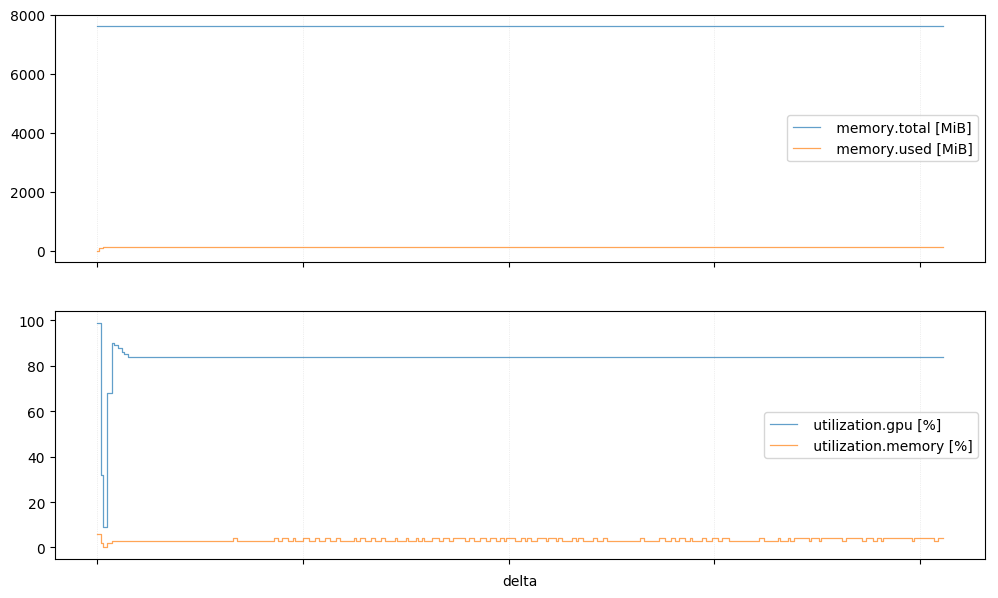

In [53]:
plt.rcParams['figure.figsize'] = 12,8
fig, axarr = plt.subplots(2,sharex=True)
smi_MB.plot(drawstyle="steps-post",linewidth=0.9,alpha=0.7,ax = axarr[0])
smi_pr.plot(drawstyle="steps-post",linewidth=0.9,alpha=0.7,ax = axarr[1])
for axis in axarr:
    axis.legend()
    axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
    #axis.xaxis.set_major_locator(plt.MaxNLocator(24))
    #axis.xaxis.set_major_locator(dates.SecondLocator(bysecond = range(120), interval = 10))
    #axis.xaxis.set_minor_locator(dates.MicrosecondLocator(interval = 1000))
    #axis.xaxis.set_major_formatter(dates.DateFormatter('%S:%f'))
plt.show()

In [54]:
filename = "HPCG/nvidia-smi-hpcg.csv"
print "Reading",filename

smi_hpcg = pd.read_csv(filename)

Reading HPCG/nvidia-smi-hpcg.csv


In [56]:
smi_hpcg.iloc[10:20]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],clocks.current.sm [MHz],clocks.current.memory [MHz]
10,2017/12/19 06:58:07.734,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1177 MHz,2505 MHz
11,2017/12/19 06:58:07.834,Tesla M60,7613 MiB,0 MiB,0 %,0 %,1177 MHz,2505 MHz
12,2017/12/19 06:58:07.935,Tesla M60,7613 MiB,12 MiB,0 %,0 %,1177 MHz,2505 MHz
13,2017/12/19 06:58:08.037,Tesla M60,7613 MiB,96 MiB,0 %,0 %,1177 MHz,2505 MHz
14,2017/12/19 06:58:08.137,Tesla M60,7613 MiB,113 MiB,6 %,0 %,1177 MHz,2505 MHz
15,2017/12/19 06:58:08.239,Tesla M60,7613 MiB,1045 MiB,29 %,19 %,1177 MHz,2505 MHz
16,2017/12/19 06:58:08.339,Tesla M60,7613 MiB,1045 MiB,29 %,19 %,1177 MHz,2505 MHz
17,2017/12/19 06:58:08.440,Tesla M60,7613 MiB,1045 MiB,19 %,2 %,1177 MHz,2505 MHz
18,2017/12/19 06:58:08.540,Tesla M60,7613 MiB,1045 MiB,19 %,2 %,1177 MHz,2505 MHz
19,2017/12/19 06:58:08.640,Tesla M60,7613 MiB,1045 MiB,17 %,2 %,1177 MHz,2505 MHz


In [57]:
smi_hpcg.index = pd.to_datetime(smi_hpcg['timestamp'])
start = smi_hpcg.index[0]
smi_hpcg["delta"] = smi_hpcg.index - start
smi_hpcg = smi_hpcg.set_index(smi_hpcg['delta'])
smi_hpcg = smi_hpcg.drop(columns = ['timestamp', ' name', 'delta'])
smi_hpcg = smi_hpcg.applymap(parseFloat)
smi_MB_h = smi_hpcg.filter(regex=(".*\[MiB.*"))
smi_pr_h = smi_hpcg.filter(regex=(".*\[\%.*"))


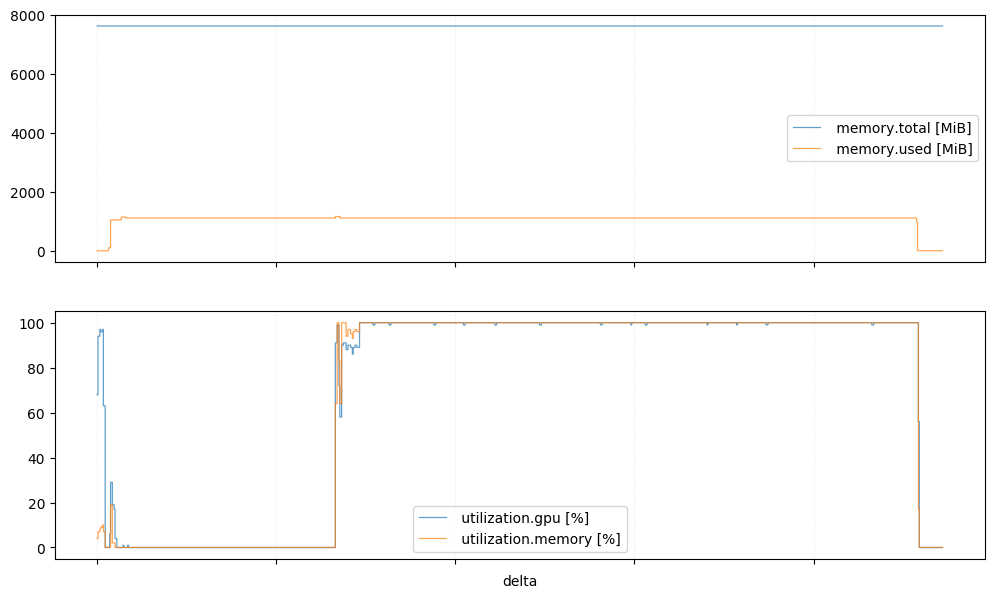

In [59]:
plt.rcParams['figure.figsize'] = 12,8
fig, axarr = plt.subplots(2,sharex=True)
smi_MB_h.plot(drawstyle="steps-post",linewidth=0.9,alpha=0.7,ax = axarr[0])
smi_pr_h.plot(drawstyle="steps-post",linewidth=0.9,alpha=0.7,ax = axarr[1])
for axis in axarr:
    axis.legend()
    axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
    #axis.xaxis.set_major_locator(plt.MaxNLocator(24))
    #axis.xaxis.set_major_locator(dates.SecondLocator(bysecond = range(120), interval = 10))
    #axis.xaxis.set_minor_locator(dates.MicrosecondLocator(interval = 1000))
    #axis.xaxis.set_major_formatter(dates.DateFormatter('%S:%f'))
plt.show()

